In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [26]:
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Nivel_Estres': [7, 5, 8, 6, 9, 4, 7, 6, 8, 5, 6, 7, 5, 8, 7, 6, 9, 4, 5, 6],
    'Duracion_Confinamiento': [180, 200, 150, 210, 190, 160, 170, 180, 200, 210, 190, 160, 170, 180, 200, 210, 190, 160, 170, 180],
    'Situacion_Laboral': ['Empleada', 'Desempleado', 'Teletrabajo', 'Empleada', 'Empleada', 'Desempleado', 'Teletrabajo', 'Empleada', 'Empleada', 'Desempleado', 'Teletrabajo', 'Empleada', 'Empleada', 'Desempleado', 'Teletrabajo', 'Empleada', 'Empleada', 'Desempleado', 'Teletrabajo', 'Empleada'],
    'Ingreso_Economico': [3000, 1500, 2500, 2800, 3200, 1400, 2300, 2900, 3100, 1600, 2400, 2700, 3000, 1500, 2500, 2800, 3200, 1400, 2300, 2900],
    'Acceso_Recursos_Salud_Mental': [3, 0, 2, 1, 2, 1, 0, 3, 2, 1, 2, 3, 0, 1, 2, 1, 2, 0, 3, 2],
    'Contacto_Social': [5, 3, 7, 2, 4, 5, 6, 2, 4, 3, 6, 7, 5, 3, 4, 2, 5, 6, 3, 4],
    'Estado_Salud_Fisica': [1, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 1, 2],
    'Edad': [30, 45, 25, 35, 40, 50, 28, 34, 42, 31, 38, 29, 46, 27, 33, 41, 32, 44, 30, 36],
    'Genero': ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
    'Nivel_Educativo': ['Licenciatura', 'Secundaria', 'Maestría', 'Licenciatura', 'Licenciatura', 'Secundaria', 'Maestría', 'Licenciatura', 'Licenciatura', 'Secundaria', 'Maestría', 'Licenciatura', 'Licenciatura', 'Secundaria', 'Maestría', 'Licenciatura', 'Licenciatura', 'Secundaria', 'Maestría', 'Licenciatura'],
    'Ubicacion_Geografica': ['USA', 'Spain', 'Germany', 'France', 'Italy', 'UK', 'Canada', 'Australia', 'India', 'Brazil', 'Mexico', 'Russia', 'China', 'Japan', 'South Korea', 'South Africa', 'Nigeria', 'Argentina', 'Chile', 'Colombia']
}

df = pd.DataFrame(data)

In [27]:
df

,ID,Nivel_Estres,Duracion_Confinamiento,Situacion_Laboral,Ingreso_Economico,Acceso_Recursos_Salud_Mental,Contacto_Social,Estado_Salud_Fisica,Edad,Genero,Nivel_Educativo,Ubicacion_Geografica
0,1,7,180,Empleada,3000,3,5,1,30,F,Licenciatura,USA
1,2,5,200,Desempleado,1500,0,3,0,45,M,Secundaria,Spain
2,3,8,150,Teletrabajo,2500,2,7,2,25,F,Maestría,Germany
3,4,6,210,Empleada,2800,1,2,1,35,M,Licenciatura,France
4,5,9,190,Empleada,3200,2,4,1,40,F,Licenciatura,Italy
5,6,4,160,Desempleado,1400,1,5,2,50,M,Secundaria,UK
6,7,7,170,Teletrabajo,2300,0,6,0,28,F,Maestría,Canada
7,8,6,180,Empleada,2900,3,2,1,34,M,Licenciatura,Australia
8,9,8,200,Empleada,3100,2,4,2,42,F,Licenciatura,India
9,10,5,210,Desempleado,1600,1,3,1,31,M,Secundaria,Brazil


In [28]:
# Convertir variables categóricas a variables dummy (0 o 1)
df = pd.get_dummies(df, columns=['Situacion_Laboral', 'Genero', 'Nivel_Educativo', 'Ubicacion_Geografica'], drop_first=True)

In [36]:
df

,ID,Nivel_Estres,Duracion_Confinamiento,Ingreso_Economico,Acceso_Recursos_Salud_Mental,Contacto_Social,Estado_Salud_Fisica,Edad,Situacion_Laboral_Empleada,Situacion_Laboral_Teletrabajo,...,Ubicacion_Geografica_Italy,Ubicacion_Geografica_Japan,Ubicacion_Geografica_Mexico,Ubicacion_Geografica_Nigeria,Ubicacion_Geografica_Russia,Ubicacion_Geografica_South Africa,Ubicacion_Geografica_South Korea,Ubicacion_Geografica_Spain,Ubicacion_Geografica_UK,Ubicacion_Geografica_USA
0,1,7,180,3000,3,5,1,30,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2,5,200,1500,0,3,0,45,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,8,150,2500,2,7,2,25,False,True,...,False,False,False,False,False,False,False,False,False,False
3,4,6,210,2800,1,2,1,35,True,False,...,False,False,False,False,False,False,False,False,False,False
4,5,9,190,3200,2,4,1,40,True,False,...,True,False,False,False,False,False,False,False,False,False
5,6,4,160,1400,1,5,2,50,False,False,...,False,False,False,False,False,False,False,False,True,False
6,7,7,170,2300,0,6,0,28,False,True,...,False,False,False,False,False,False,False,False,False,False
7,8,6,180,2900,3,2,1,34,True,False,...,False,False,False,False,False,False,False,False,False,False
8,9,8,200,3100,2,4,2,42,True,False,...,False,False,False,False,False,False,False,False,False,False
9,10,5,210,1600,1,3,1,31,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Verificar que no haya valores NaN
print(df.isna().sum())

ID                                   0
Nivel_Estres                         0
Duracion_Confinamiento               0
Ingreso_Economico                    0
Acceso_Recursos_Salud_Mental         0
Contacto_Social                      0
Estado_Salud_Fisica                  0
Edad                                 0
Situacion_Laboral_Empleada           0
Situacion_Laboral_Teletrabajo        0
Genero_M                             0
Nivel_Educativo_Maestría             0
Nivel_Educativo_Secundaria           0
Ubicacion_Geografica_Australia       0
Ubicacion_Geografica_Brazil          0
Ubicacion_Geografica_Canada          0
Ubicacion_Geografica_Chile           0
Ubicacion_Geografica_China           0
Ubicacion_Geografica_Colombia        0
Ubicacion_Geografica_France          0
Ubicacion_Geografica_Germany         0
Ubicacion_Geografica_India           0
Ubicacion_Geografica_Italy           0
Ubicacion_Geografica_Japan           0
Ubicacion_Geografica_Mexico          0
Ubicacion_Geografica_Nige

In [30]:
# Definir la variable dependiente y las variables independientes
Y = df['Nivel_Estres']
X = df.drop(columns=['ID', 'Nivel_Estres'])

In [31]:
# Convertir las columnas a tipo float para evitar problemas
X = X.astype(float)
Y = Y.astype(float)

In [32]:
# Agregar una constante para el término independiente (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(Y, X).fit()

In [33]:
# Resumen del modelo
print(model.summary())

# Estadísticas descriptivas
print(df.describe())

                            OLS Regression Results                            
Dep. Variable:           Nivel_Estres   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 13 Jul 2024   Prob (F-statistic):                nan
Time:                        15:54:20   Log-Likelihood:                 578.19
No. Observations:                  20   AIC:                            -1116.
Df Residuals:                       0   BIC:                            -1096.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

/Users/jorgecontreras/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/jorgecontreras/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/jorgecontreras/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


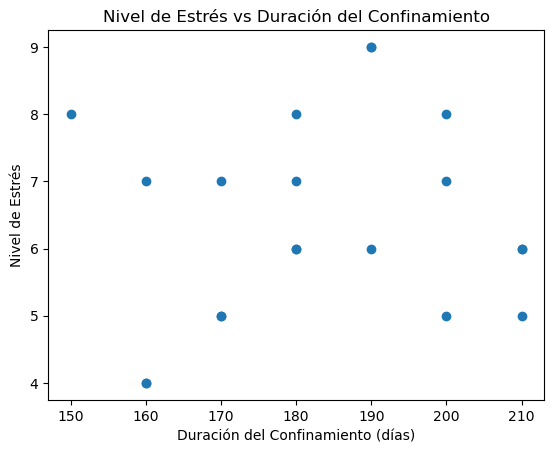

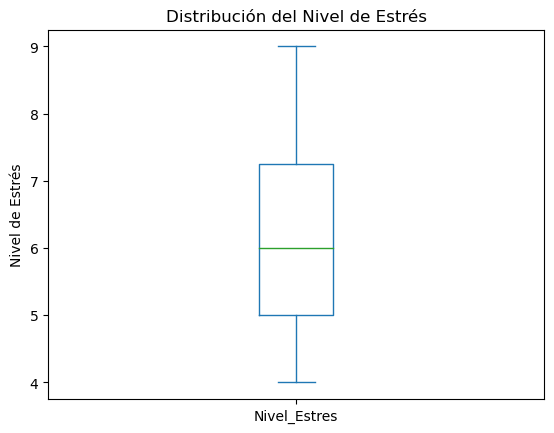

In [34]:
# Gráfico de dispersión de nivel de estrés
plt.scatter(df['Duracion_Confinamiento'], df['Nivel_Estres'])
plt.title('Nivel de Estrés vs Duración del Confinamiento')
plt.xlabel('Duración del Confinamiento (días)')
plt.ylabel('Nivel de Estrés')
plt.show()

# Boxplot de nivel de estrés
df['Nivel_Estres'].plot(kind='box')
plt.title('Distribución del Nivel de Estrés')
plt.ylabel('Nivel de Estrés')
plt.show()